In [1]:
import pandas as pd 
import numpy as np

In [ ]:
# here we import the dataset
data = pd.read_csv("housing.csv")

In [ ]:
# we explore the strcutre of the dataset
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [ ]:
# here we check for missing values , total_bedromms have many missing values
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [44]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
#dimenions of the dataset 10 features and 20640 examples 
data.shape

(20640, 10)

In [ ]:
# here we delete missing value from the dataset 
data_cleaned = data.dropna()

In [47]:
data_cleaned.size

204330

In [ ]:
# here we explore the elements of ocean_proximity colmun to encode them
print(data_cleaned['ocean_proximity'].value_counts())


ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64


In [ ]:
mapping_dict = {''}

In [ ]:
# this basic label logic 
['ocean_proximity'] = data_cleaned['ocean_proximity'].map({
    'NEAR BAY': 1,
    'INLAND': 0,
    '<1H OCEAN': 2,
    'NEAR OCEAN': 3,
    'ISLAND': 4
})


C:\Users\Hamza Elhaiki\AppData\Local\Temp\ipykernel_15524\3221613994.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['ocean_proximity'] = data_cleaned['ocean_proximity'].map({


In [50]:
print(data_cleaned['ocean_proximity'].value_counts())


ocean_proximity
2    9034
0    6496
3    2628
1    2270
4       5
Name: count, dtype: int64


In [51]:
data_cleaned.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,1


In [ ]:
# here we see correlation matrix to see reltionship between variables
correlation_matrix = data_cleaned.corr()
correlation_matrix


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398,0.203584
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638,-0.464825
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432,0.138903
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294,-0.019157
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.011620
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300,0.027633
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894,0.037243
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355,0.199640
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000,0.422059
ocean_proximity,0.203584,-0.464825,0.138903,-0.019157,0.011620,0.027633,0.037243,0.199640,0.422059,1.000000


In [53]:
# split features 
X = data_cleaned.drop('median_house_value',axis=1)
y = data_cleaned

In [54]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,1


In [55]:
y.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,1


In [ ]:
from sklearn.model_selection import train_test_split

# split data using methdos from sklearn 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [57]:
X_train.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
dtype: int64

In [ ]:
from sklearn.linear_model import LinearRegression

# here we use predefined linear regression model from sklearn 
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [62]:
y_pred=model.predict(X_test)

In [63]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mse

482790540.77123594

In [64]:
import numpy as np
rmse = np.sqrt(mse)
print("RMSE:", rmse)


RMSE: 21972.495096625596


In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)


MAE: 5057.399079558821


In [ ]:
# here we evaluatr our model give good accuracy
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)


R² Score: 0.9646958567989262


Matplotlib is building the font cache; this may take a moment.


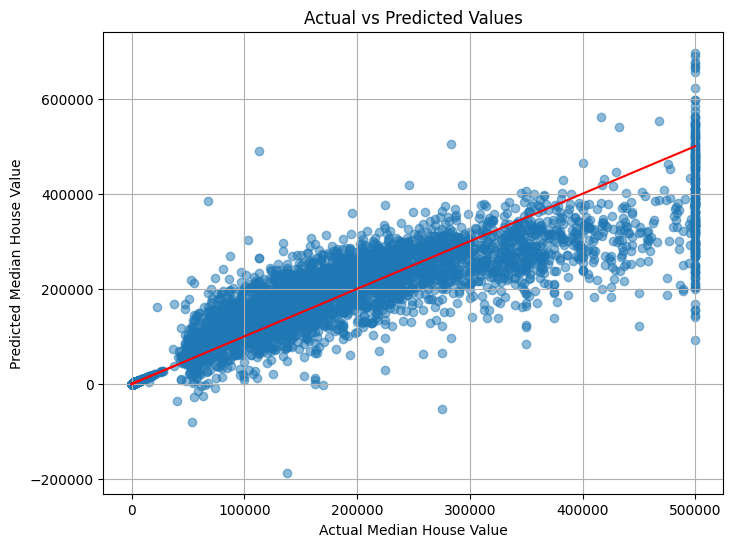

In [67]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  # perfect prediction line
plt.grid(True)
plt.show()


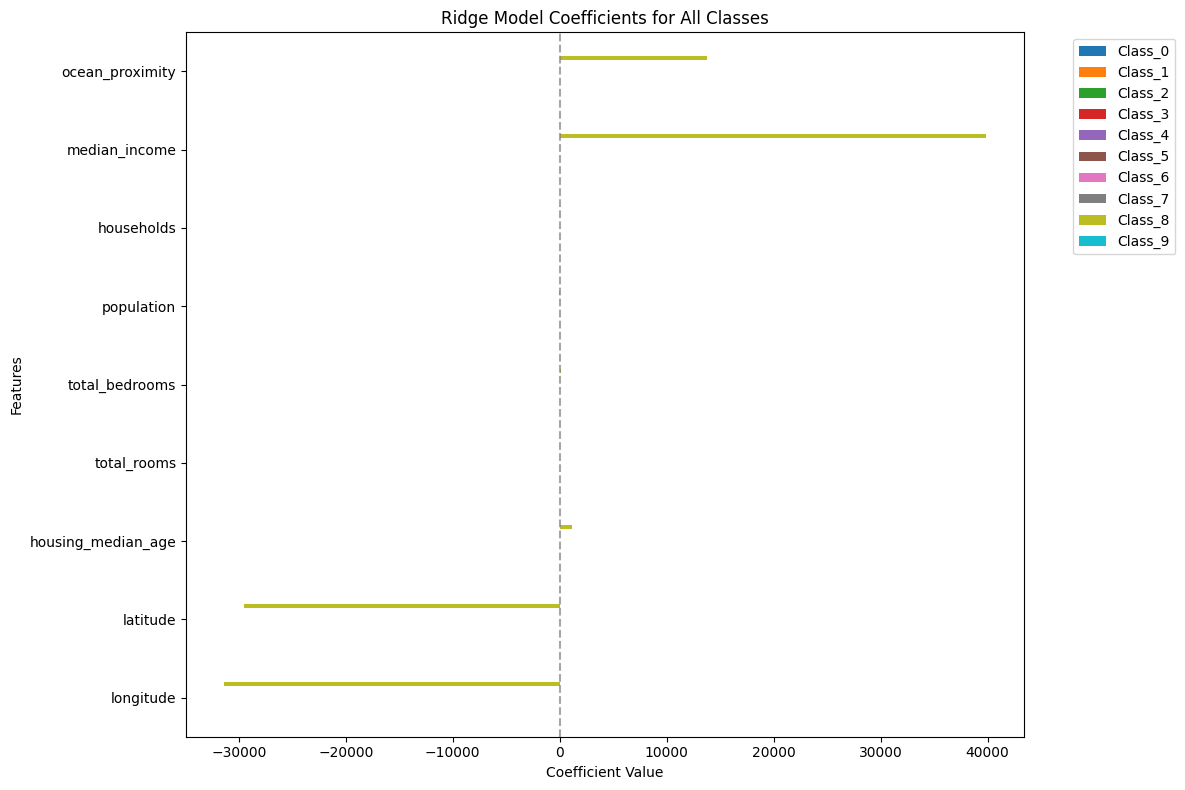

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Create DataFrame with proper shape - transpose the coefficients
coefs = pd.DataFrame(
    model.coef_.T,  # Transpose to get (9, 10) shape
    columns=[f"Class_{i}" for i in range(model.coef_.shape[0])],  # 10 classes
    index=X_train.columns  # 9 features
)

# Plot all coefficients
fig, ax = plt.subplots(figsize=(12, 8))
coefs.plot(kind="barh", ax=ax)
plt.title("Ridge Model Coefficients for All Classes")
plt.axvline(x=0, color=".5", linestyle="--", alpha=0.7)
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# this grpah show the impotance of features in model prediction